## GDP Per Person *(1901 - 2011)*

Link para o Dataset: [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

In [125]:
import pandas as pd
import numpy as np

In [126]:
gdp = pd.read_csv('data/GDP.csv', decimal='.')
gdp.head(5)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40


In [127]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


In [128]:
gdp.isnull().value_counts()

Country  Region  Year    GDP_pp 
False    False   False  False       4419
Name: count, dtype: int64

#### Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [129]:
# limpando conjunto de dados
gdp['GDP_pp'] = gdp[' GDP_pp ']
del gdp[' GDP_pp ']

# fazendo as devidas conversões
gdp['Year'] = pd.to_datetime(gdp['Year'])
gdp['Year'] = gdp['Year'].apply(lambda x: x.year)

gdp['GDP_pp'] = gdp['GDP_pp'].apply(lambda x: x.replace(',', ''))
gdp['GDP_pp'] = gdp['GDP_pp'].apply(lambda x: float(x))

In [130]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4419 non-null   object 
 1   Region   4419 non-null   object 
 2   Year     4419 non-null   int64  
 3   GDP_pp   4419 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 138.2+ KB


In [131]:
gdp.head(5)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40


#### Você conseguiria informar o primeiro valor registrado de cada país?

In [132]:
gdp.groupby('Country').min()['Year'].to_frame()

,Year
Country,
Afghanistan,1901
Albania,1901
Algeria,1901
Andorra,1901
Angola,1901
...,...
Venezuela,1901
Vietnam,1901
"Yemen, Rep.",1901


#### Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [133]:
gdp[gdp['Year'] < 2000].max()

Country              Zimbabwe
Region     Sub-Saharan Africa
Year                     1996
GDP_pp               118681.3
dtype: object

In [134]:
gdp_start = gdp[gdp['Year'] == 1901]
gdp_end = gdp[gdp['Year'] == 1996]

In [135]:
((gdp_end.groupby('Region')['GDP_pp'].mean() / gdp_start.groupby('Region')['GDP_pp'].mean() - 1) * 100).round(3).sort_values().to_frame()

,GDP_pp
Region,
Sub-Saharan Africa,248.634
South America,312.124
Australia and Oceania,396.075
Central America and the Caribbean,406.427
North America,589.760
Europe,594.046
Asia,711.762
"Middle East, North Africa, and Greater Arabia",857.216


#### Preencha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [136]:
arr_year = np.arange(gdp['Year'].min(), gdp['Year'].max())
df_years = pd.DataFrame(arr_year, columns=['Year'])
df_years.index = df_years['Year']

df_years_off = ~df_years['Year'].isin(gdp['Year'])   # coloca todos os valores não presentes na tabela em um df
df_years_off = df_years.loc[df_years_off].index

In [137]:
df_years_off

Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914, 1915,
       1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930,
       1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942, 1943, 1944, 1945,
       1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960,
       1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1972, 1973, 1974, 1975,
       1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990,
       1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005,
       2007, 2008, 2009, 2010],
      dtype='int64', name='Year')

In [138]:
gdp = gdp.sort_values(['Country', 'Year'])

gdp['delta_gdp'] = gdp['GDP_pp'] - gdp['GDP_pp'].shift(1)
gdp['delta_year'] = gdp['Year'] - gdp['Year'].shift(1)
gdp['gdp_year'] = (gdp['delta_gdp'] / gdp['delta_year']).shift(-1)

In [139]:
gdp['next_year'] = gdp['Year'].shift(-1)
del gdp['delta_gdp'], gdp['delta_year']

In [140]:
gdp.head(5)

,Country,Region,Year,GDP_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


In [141]:
df_new_data = pd.DataFrame()

for idx, row in gdp.iterrows():
    if row['Year'] == 2011:
        continue
    
    years_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off >row["Year"])]    
    
    for new_year in years_to_add:
        add_row = row.copy()
        add_row['GDP_pp'] = (new_year - add_row['Year']) * add_row['gdp_year'] + add_row['GDP_pp']
        add_row['Year'] = new_year
        add_row['kind'] = 'estimated'
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [142]:
gdp = pd.concat([gdp, df_new_data])
gdp.sort_values(['Country', 'Year'], inplace=True)
gdp.index = gdp['Year']
gdp['kind'].fillna('real', inplace=True)

In [143]:
gdp

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


<Axes: xlabel='Year', ylabel='GDP_pp'>

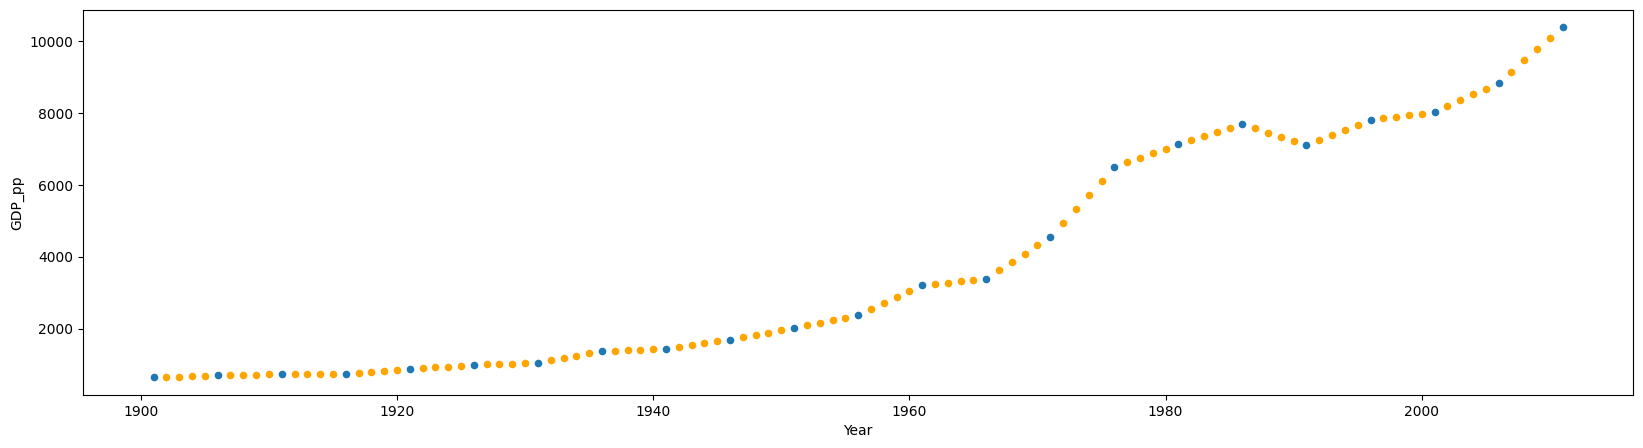

In [144]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))

country = 'Brazil'
gdp[(gdp['kind'] == 'real') & (gdp['Country'] == country)].plot(kind='scatter', y='GDP_pp', x='Year', ax=ax)
gdp[(gdp['kind'] == 'estimated') & (gdp['Country'] == country)].plot(kind='scatter', y='GDP_pp', x='Year', ax=ax, color='orange')
